In [444]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from libs.p1_library import chemical_filter
from libs.p1_library import chemical_filter
from libs.p1_library import chemical_to_moles
from datetime import datetime
import plotly.graph_objects as go


In [445]:
#Testing to see what the full file looks like before adding the chemical filter
filepath = Path('C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/chemical_data.csv')
csv_df = pd.read_csv(filepath,parse_dates=True, infer_datetime_format=True)
csv_df

,Unnamed: 0,SAMPLE_DATE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,DETECT_FLAG,REPORTABLE_RESULT,LONGITUDE,LATITUDE,LOC_NAME
0,54,2017-10-10 08:00:00,2017-2019 OU2 PDI Sediment,E1613,1746-01-6,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",39.3,pg/g,0.189,Y,Yes,-74.118448,40.708445,NaN
1,130,2017-10-19 14:50:00,2017-2019 OU2 PDI Sediment,E1613,1746-01-6,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",106.0,pg/g,0.654,Y,Yes,-74.120683,40.707897,NaN
2,222,2017-10-19 14:50:00,2017-2019 OU2 PDI Sediment,E1613,1746-01-6,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",199.0,pg/g,0.654,Y,Yes,-74.120683,40.707897,NaN
3,298,2017-10-19 14:50:00,2017-2019 OU2 PDI Sediment,E1613,1746-01-6,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",548.0,pg/g,1.090,Y,Yes,-74.120683,40.707897,NaN
4,390,2017-10-19 14:50:00,2017-2019 OU2 PDI Sediment,E1613,1746-01-6,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",98.9,pg/g,0.986,Y,Yes,-74.120683,40.707897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76483,15876,2019-07-09 11:00:00,2019 OU2 PDI Porewater Passive Sampler,SW6010,7439-92-1,Lead,400.0,mg/kg,0.990,Y,Yes,-74.145593,40.735957,LPR-0403-01
76484,15881,2019-07-10 10:45:00,2019 OU2 PDI Porewater Passive Sampler,SW6010,7439-92-1,Lead,370.0,mg/kg,1.100,Y,Yes,-74.149512,40.734412,LPR-0430-07
76485,15884,2019-07-09 16:10:00,2019 OU2 PDI Porewater Passive Sampler,SW6010,7439-92-1,Lead,11.0,mg/kg,0.730,Y,Yes,-74.155944,40.770182,LPR-0752-01R
76486,15889,2019-07-09 14:15:00,2019 OU2 PDI Porewater Passive Sampler,SW6010,7439-92-1,Lead,51.0,mg/kg,0.640,Y,Yes,-74.152242,40.774933,LPR-0790-03R


In [446]:
#Adding the chemical filer function to filter down to the two chemicals 
#file_path = '../data/cleandata'
#chemical_list = ["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)","Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"]
#filtered_data = chemical_filter(file_path, chemical_list)
#filtered_data

In [447]:
filepath = Path('C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/kristas_lists/kristas_full_list.csv')
csv_df_filter = pd.read_csv(filepath, index_col = [0], parse_dates=True, infer_datetime_format=True)
csv_df_filter

,LOC_NAME,SAMPLE_DATE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,DETECT_FLAG,REPORTABLE_RESULT,LONGITUDE,LATITUDE
19,Hackensack River,7/23/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",54.7,pg/g,54.7,N,Yes,-74.039502,40.879778
20,Hackensack River,7/30/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",45.0,pg/g,45.0,N,Yes,-74.069464,40.798054
21,Kill Van Kull,8/20/1981,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",42.5,pg/g,42.5,N,Yes,-74.098822,40.648703
22,Newark Bay,8/21/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",39.1,pg/g,39.1,N,Yes,-74.139111,40.671200
23,Newark Bay,4/26/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",37.8,pg/sample,37.8,N,Yes,-74.139111,40.671200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499,LPR-0765-01,2019-07-29 13:45:00,2019 OU2 PDI Porewater Passive Sampler,E1668A,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",257.0,pg/g,257.0,N,Yes,-74.155138,40.771860
7500,LPR-0790-01,2019-07-19 14:20:00,2019 OU2 PDI Porewater Passive Sampler,E1668A,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",4700.0,pg/g,641.0,Y,Yes,-74.152877,40.775143
7501,LPR-0790-03R,2019-07-08 00:00:00,2019 OU2 PDI Porewater Passive Sampler,E1668A,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",204.0,pg/g,204.0,N,Yes,-74.152242,40.774933
7502,LPR-0650-05,2019-07-08 00:00:00,2019 OU2 PDI Porewater Passive Sampler,E1668A,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",2400.0,pg/g,436.0,Y,Yes,-74.163651,40.757093


In [448]:
#Convert units in chart
converted_data = chemical_to_moles(csv_df_filter)
converted_data.head()

,LOC_NAME,SAMPLE_DATE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,DETECT_FLAG,REPORTABLE_RESULT,LONGITUDE,LATITUDE,VALUE_MUGRAM_PER_GRAM,VALUE_MUMOL_PER_GRAM
19,Hackensack River,7/23/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",54.7,pg/g,54.7,N,Yes,-74.039502,40.879778,0.000055,1.515748e-07
20,Hackensack River,7/30/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",45.0,pg/g,45.0,N,Yes,-74.069464,40.798054,0.000045,1.246959e-07
21,Kill Van Kull,8/20/1981,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",42.5,pg/g,42.5,N,Yes,-74.098822,40.648703,0.000042,1.177683e-07
22,Newark Bay,8/21/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",39.1,pg/g,39.1,N,Yes,-74.139111,40.671200,0.000039,1.083469e-07
23,Newark Bay,4/26/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",37.8,pg/sample,37.8,N,Yes,-74.139111,40.671200,0.000038,1.047445e-07


In [449]:
converted_data['YEAR'] = pd.to_datetime(converted_data['SAMPLE_DATE']).dt.year
converted_data.head()

,LOC_NAME,SAMPLE_DATE,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,DETECT_FLAG,REPORTABLE_RESULT,LONGITUDE,LATITUDE,VALUE_MUGRAM_PER_GRAM,VALUE_MUMOL_PER_GRAM,YEAR
19,Hackensack River,7/23/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",54.7,pg/g,54.7,N,Yes,-74.039502,40.879778,0.000055,1.515748e-07,1985
20,Hackensack River,7/30/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",45.0,pg/g,45.0,N,Yes,-74.069464,40.798054,0.000045,1.246959e-07,1985
21,Kill Van Kull,8/20/1981,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",42.5,pg/g,42.5,N,Yes,-74.098822,40.648703,0.000042,1.177683e-07,1981
22,Newark Bay,8/21/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",39.1,pg/g,39.1,N,Yes,-74.139111,40.671200,0.000039,1.083469e-07,1985
23,Newark Bay,4/26/1985,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",37.8,pg/sample,37.8,N,Yes,-74.139111,40.671200,0.000038,1.047445e-07,1985


In [450]:
#Group by chemical name and report value in umol
filtered_columns = converted_data[["CHEMICAL_NAME", "VALUE_MUMOL_PER_GRAM"]]
average_concentration = filtered_columns.groupby("CHEMICAL_NAME").mean()
average_concentration

,VALUE_MUMOL_PER_GRAM
CHEMICAL_NAME,
"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",0.000001
"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",0.000001


In [451]:
average_concentration.hvplot.bar()

:Bars   [CHEMICAL_NAME]   (VALUE_MUMOL_PER_GRAM)

In [ ]:
converted_data = converted_data.set_index("YEAR")
converted_data = converted_data.drop(columns=["SAMPLE_DATE"])
converted_data = converted_data.sort_index(ascending=True)
converted_data.head()

,LOC_NAME,TASK_CODE,ANALYTIC_METHOD,CAS_RN,CHEMICAL_NAME,REPORT_RESULT_VALUE,REPORT_RESULT_UNIT,REPORT_RESULT_LIMIT,DETECT_FLAG,REPORTABLE_RESULT,LONGITUDE,LATITUDE,VALUE_MUGRAM_PER_GRAM,VALUE_MUMOL_PER_GRAM
YEAR,,,,,,,,,,,,,,
1981,Kill Van Kull,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",42.5,pg/g,42.5,N,Yes,-74.098822,40.648703,0.000042,1.177683e-07
1981,Kill Van Kull,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",173.0,pg/g,34.4,Y,Yes,-74.098822,40.648703,0.000173,5.299709e-07
1985,Hackensack River,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,32774-16-6,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)",54.7,pg/g,54.7,N,Yes,-74.039502,40.879778,0.000055,1.515748e-07
1985,Hackensack River,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",98.7,pg/sample,49.7,Y,Yes,-74.069464,40.798054,0.000099,3.023591e-07
1985,Passaic River,1981-2014 RPI(Bopp) SED/ SUS Matter,E1668A MLA010,57465-28-8,"Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)",180.0,pg/sample,145.0,Y,Yes,-74.120054,40.724381,0.000180,5.514148e-07


In [ ]:
# Create a new pivot table where the columns are the closing prices for each ticker
new_pivot_table = converted_data.pivot_table(values='VALUE_MUMOL_PER_GRAM', index=converted_data.index, columns='CHEMICAL_NAME', aggfunc='first')
new_pivot_table

CHEMICAL_NAME,"Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)","Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"
YEAR,,
1981,1.177683e-07,5.299709e-07
1985,1.515748e-07,3.023591e-07
1986,6.290214e-07,1.421425e-06
1991,3.879427e-08,1.439805e-09
1992,8.035957e-08,4.901465e-09
1993,8.590161e-09,1.623610e-06
1996,1.125034e-07,5.330343e-07
1997,2.694262e-07,3.026042e-07
1999,1.582252e-07,9.282150e-07


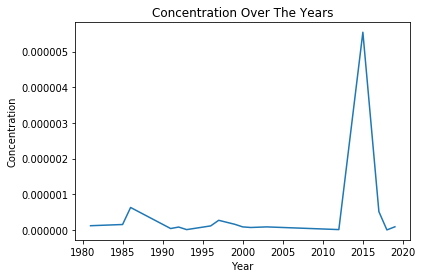

In [ ]:
first_plot = new_pivot_table["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)"].plot(xlabel='YEAR',ylabel="Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)", title='Concentration Over The Years', kind='line')
first_plot.set_xlabel('Year')
first_plot.set_ylabel('Concentration')
first_plot

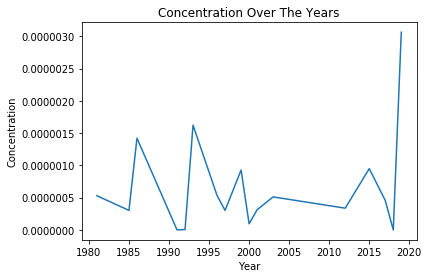

In [ ]:
second_plot = new_pivot_table["Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"].plot(xlabel='YEAR',ylabel="Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)", title='Concentration Over The Years', kind='line')
second_plot.set_xlabel('Year')
second_plot.set_ylabel('Concentration')
second_plot

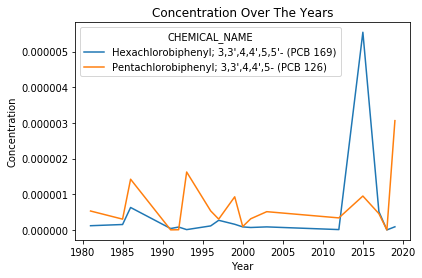

In [ ]:
combined_plot = new_pivot_table.plot(xlabel='YEAR',ylabel=["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)", "Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"], title='Concentration Over The Years', kind='line')
combined_plot.set_xlabel('Year')
combined_plot.set_ylabel('Concentration')
combined_plot

In [453]:
new_pivot_table.hvplot(kind='scatter', x='YEAR', y=["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)","Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"])

:NdOverlay   [CHEMICAL_NAME]
   :Scatter   [YEAR]   (value)

In [ ]:


fig = px.bar(converted_data, x="CHEMICAL_NAME", y="VALUE_MUMOL_PER_GRAM", color="CHEMICAL_NAME",
  animation_frame="YEAR", animation_group="CHEMICAL_NAME", range_y=[0, 0.000001])
fig.show()

In [ ]:
years = ["SAMPLE_DATE"]
chemical_names = []
for chemical in converted_data['CHEMICAL_NAME']:
    if chemical not in chemical_names:
        chemical_names.append(chemical)

fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

fig_dict["layout"]["xaxis"] = {"title": "Chemical Names"}
fig_dict["layout"]["yaxis"] = {"title": "Concentration", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"

fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

In [ ]:
year = 2019
for chemical in chemical_names:
    df_year = converted_data[converted_data["YEAR"] == year]
    df_by_year_name = df_year[
        df_year["CHEMICAL_NAME"] == chemical]

    data_dict = {
        "x": list(df_by_year_name["CHEMICAL_NAME"]),
        "y": list(df_by_year_name["VALUE_MUMOL_PER_GRAM"]),
        "mode": "markers",
        "text": list(df_by_year_name["CHEMICAL_NAME"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 0.000001,
            "size": list(df_by_year_name["VALUE_MUMOL_PER_GRAM"])
        },
        "name": chemical
    }
    fig_dict["data"].append(data_dict)

In [ ]:
years = ["1981", "1985", "1991", "1996", "2000", "2003", "2012", "2014", "2018", "2019"]

for year in years:
    frame = {"data": [], "name": str(year)}
    for chemical in chemical_names:
        df_year = converted_data[converted_data["YEAR"] == int(year)]
        df_by_year_name = df_year[
            df_year["CHEMICAL_NAME"] == chemical]

        data_dict = {
            "x": list(df_by_year_name["CHEMICAL_NAME"]),
            "y": list(df_by_year_name["VALUE_MUMOL_PER_GRAM"]),
            "mode": "markers",
            "text": list(df_by_year_name["CHEMICAL_NAME"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 0.000001,
                "size": list(df_by_year_name["VALUE_MUMOL_PER_GRAM"])
            },
            "name": chemical
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()


In [ ]:
#filepath = Path('C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/chemical_filtered_more.csv')
#csv_df = pd.read_csv(filepath,parse_dates=True, infer_datetime_format=True)
#csv_df

In [ ]:
#Fixed andrew's code by deleting some lines in order to filter chemicals 

#def chemicals_filtered(file_path,chemical_list):
    #chemical_data = []
    #csv_data = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
    #for item in chemical_list:
                #chemicals_filtered = csv_data.loc[csv_data['CHEMICAL_NAME'] == item]
                #chemical_data.append(chemicals_filtered)
    #return chemical_data


In [ ]:
#This method also works 
#chemical_data = []
#def chemicals_filtered(file_path, chemical_list):
    #with open(file_path) as csvfile:
        #csvreader = csv.reader(file_path, delimiter = ",")
 
        #for item in chemical_list:
                #chemicals_filtered = csv_data.loc[csv_data['CHEMICAL_NAME'] == item]
                #chemical_data.append(chemicals_filtered)
    #return chemical_data


In [ ]:
#file_path = 'C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/chemical_filtered_more.csv'
#filtered_list = chemicals_filtered(file_path, chemical_list=["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)","Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"])
#filtered_list

In [ ]:
#filtered_list[0].to_csv('../notebooks/kristas_chemicals.csv')

In [ ]:
#filtered_list[1].to_csv('../notebooks/kristas_chemicals_2.csv')

In [ ]:
#concated_list = pd.concat(filtered_list[0:2])
#concated_list

In [ ]:
#concated_list.to_csv('../notebooks/kristas_full_list.csv')

In [ ]:

#new_filepath = Path('C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/kristas_chemicals.csv')
#with open(new_filepath, 'w') as file:
    #for file in new_filepath:
        #file.write(chemicals_filtered(file_path='C:/Users/krist/OneDrive/Desktop/environmental-contamination/notebooks/chemical_filtered_more.csv'
#, chemical_list=["Hexachlorobiphenyl; 3,3',4,4',5,5'- (PCB 169)","Pentachlorobiphenyl; 3,3',4,4',5- (PCB 126)"]))